![image.png](https://i.imgur.com/a3uAqnb.png)

## **Goal:** Build a classification model to predict the rarity of pokemon cards (normal vs legendary).

# 1️⃣ Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import kagglehub
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 2️⃣ Load the Data

In [3]:
# Download dataset
path = kagglehub.dataset_download("rounakbanik/pokemon")
print("Path:", path)

Using Colab cache for faster access to the 'pokemon' dataset.
Path: /kaggle/input/pokemon


In [4]:
# TODO: Load the CSV file into df_pokemon


pokemon_path = os.path.join(path, 'pokemon.csv')
df_pokemon = pd.read_csv(pokemon_path) # YOUR CODE HERE

print(f"Shape: {df_pokemon.shape}")
df_pokemon.head()

Shape: (801, 41)


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


# 3️⃣ EDA

In [5]:
# TODO: Check the data info and missing values
# YOUR CODE HERE
df_pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [37]:
from pandas._libs import missing
print("Missing Values: ")
df_pokemon.isnull().sum()

Missing Values: 


,0
abilities,0
against_bug,0
against_dark,0
against_dragon,0
against_electric,0
against_fairy,0
against_fight,0
against_fire,0
against_flying,0
against_ghost,0


Target Distribution:
Legandary:  70
Normal: 731


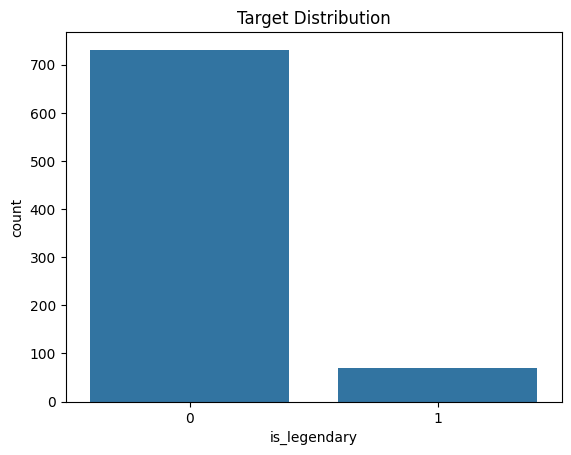

In [55]:
# TODO: Check for target imbalance
# Hint: the target column is 'is_legendary'
# YOUR CODE HERE
print("Target Distribution:")
print("Legandary: ", df_pokemon['is_legendary'].sum())
print(f"Normal: {(df_pokemon['is_legendary'] == 0).sum()}")
sns.countplot(x=df_pokemon['is_legendary'])
plt.title("Target Distribution")
plt.show()

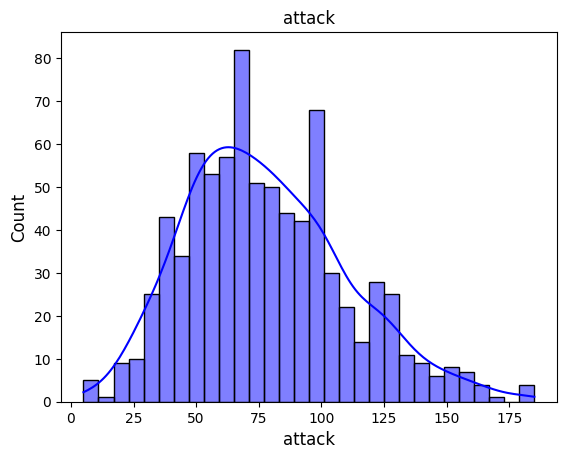


Target Variable Statistics:
Mean: 77.85767790262172
Meadian: 75.0
Standard Deviation: 32.15882023801748
Range: [  5 ,  185 ]


In [39]:
# TODO: Plot distribution of the stats (e.g., 'attack')
# YOUR CODE HERE
sns.histplot(df_pokemon['attack'],kde=True,color='blue',bins=30)

plt.title("attack")
plt.xlabel("attack", fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

print("\nTarget Variable Statistics:")
print("Mean:", df_pokemon['attack'].mean())
print("Meadian:", df_pokemon['attack'].median())
print("Standard Deviation:", df_pokemon['attack'].std())
print("Range: [ ",df_pokemon['attack'].min(), ", ",df_pokemon['attack'].max(), "]" )

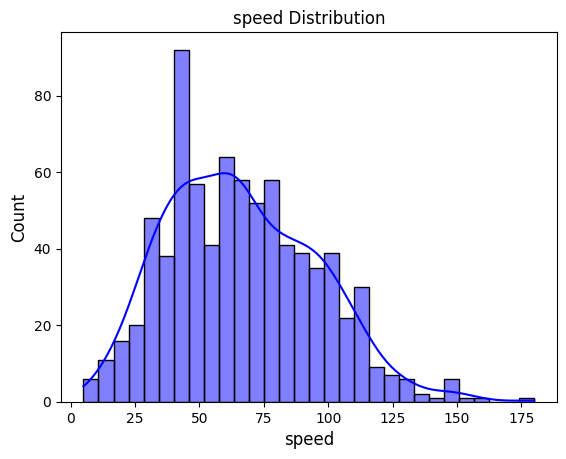


Target Variable Statistics:
Mean: 66.33458177278402
Meadian: 65.0
Standard Deviation: 28.90766187546336
Range: [  5 ,  1640000 ]


In [40]:
sns.histplot(df_pokemon['speed'],kde=True,color='blue',bins=30)

plt.title("speed Distribution")
plt.xlabel("speed", fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()

print("\nTarget Variable Statistics:")
print("Mean:", df_pokemon['speed'].mean())
print("Meadian:", df_pokemon['speed'].median())
print("Standard Deviation:", df_pokemon['speed'].std())
print("Range: [ ",df_pokemon['speed'].min(), ", ",df_pokemon['experience_growth'].max(), "]" )

# 4️⃣ Data Cleaning

In [42]:
# Define stat columns
stat_cols = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# TODO: Drop rows with missing stat values
df_clean = df_pokemon.dropna(subset=stat_cols)
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [43]:
# TODO: Fill missing type2
df_clean['type2'] = df_clean['type2'].fillna('None')

# 5️⃣ Encode Categorical Variables

In [44]:
# TODO: Encode type1 and type2 using LabelEncoder
le = LabelEncoder()
df_clean['type1'] = le.fit_transform(df_clean['type1'])
df_clean['type2'] = le.fit_transform(df_clean['type2'])

Encoded_columns= df_clean[['type1','type2']]
Encoded_columns.head()

,type1,type2
0,9,14
1,9,14
2,9,14
3,6,0
4,6,0


# 6️⃣ Feature Engineering

In [46]:
# TODO: Create total_stats feature (sum of all stat columns)
df_clean['total_stats'] = df_clean[stat_cols].sum(axis=1)

# TODO: Create attack_defense_ratio feature
df_clean['attack_defense_ratio'] = df_clean['defense'] /( df_clean['attack'] +1)

df_clean[['total_stats', 'attack_defense_ratio']].head()

,total_stats,attack_defense_ratio
0,318,0.980000
1,405,1.000000
2,625,1.217822
3,309,0.811321
4,405,0.892308


# 7️⃣ Prepare Data

In [47]:
# Define features and target
feature_cols = stat_cols + ['total_stats', 'attack_defense_ratio', 'type1', 'type2']

X = df_clean[feature_cols]
y = df_clean['is_legendary']

# TODO: Split data with stratification (test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (640, 10), Test: (161, 10)


In [48]:
# TODO: Scale features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8️⃣ Train Model
### Challenge : Try to get > 99% F1 score

In [52]:
# TODO: Train RandomForestClassifier with class_weight='balanced'
model = RandomForestClassifier(n_estimators=100 ,class_weight='balanced', max_depth=15, random_state=42)

# YOUR CODE HERE - fit the model
model.fit(X_train_scaled,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, random_state=42)

# 9️⃣ Evaluate Model

In [53]:
# TODO: Make predictions and print accuracy
y_pred = model.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred, target_names=['Normal', 'Legendary']))

Accuracy: 0.9752
              precision    recall  f1-score   support

      Normal       0.97      1.00      0.99       147
   Legendary       1.00      0.71      0.83        14

    accuracy                           0.98       161
   macro avg       0.99      0.86      0.91       161
weighted avg       0.98      0.98      0.97       161



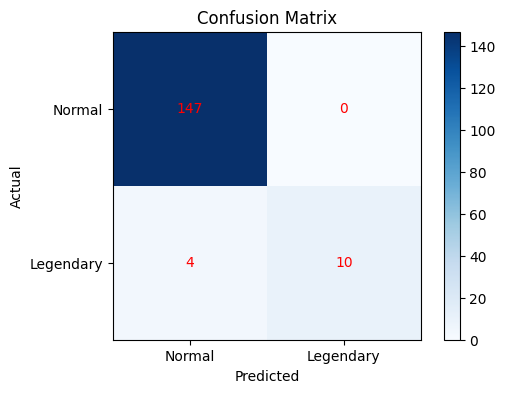

In [54]:
# TODO: Plot confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(6, 4))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Normal', 'Legendary'])
plt.yticks([0, 1], ['Normal', 'Legendary'])
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()